## Demographics Analysis for ARMADA
#### Adapted from the routines by Mattthew DeFurio
###### (shared in separate .py script)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import json
import os

%matplotlib inline

#### Load detection limits for all targets

In [2]:
targets = ['2772','6456','10453','17094','31093','34319','38545',
          '38769','43358','49643','64235','75974','82446',
          '87822','112846','114993','128415',
          '133955','137798','140159','140436','144892','145589','148283',
          '154569','156190','158140','166045','198183',
          '178475','179950','185404','189037','201038',
          ]

m1 = np.array([3.07,2.34,0.96,1.5,1.88,2.89,2.24,
               1.51,1.51,3.44,1.33,2.06,3.26,
              2.0,1.88,1.60,1.60,
              4.91,1.14,2.15,2.15,1.14,2.24,1.97,
              1.79,4.72,1.42,1.79,4.27,
              4.63,2.15,1.97,2.06,1.62])

m2 = np.array([2.98,1.79,0.87,1.5,1.6,2.4,2.06,
               1.42,1.42,2.80,1.14,1.79,3.16,
              1.5,1.23,1.51,1.33,
              4.72,1.05,2.15,1.60,1.05,1.88,1.23,
              1.60,4.45,1.33,0.96,3.99,
              3.71,2.06,1.60,1.97,1.40])

dist = np.array([306.7,84.3,39.4,25.8,82.2,228.3,104.2,
                     176.4,96.25,176.06,39.7,164.7,158.7,
                    61.2,77.9,100.1,236.4,
                    238.1,58.6,58.3,44.8,64.7,162.3,74.5,
                    137.2,404.9,103.6,49.6,235.8,
                    274.7,91.5,98.7,86.3,117.6])

print(len(dist),len(m1),len(m2),len(targets))

period = []
wobble = []
percentage = []
mass1 = []
mass2 = []
distance = []

for hd_number,mm1,mm2,d in zip(targets,m1,m2,dist):
    try:
        #print(hd_number,mm1,mm2,d)
        period.append(np.load('/Users/tgardner/ARMADA_orbits/mass_limits/HD%s/HD%s_longer_injection_per.npy'%(hd_number,hd_number)))
        wobble.append(np.load('/Users/tgardner/ARMADA_orbits/mass_limits/HD%s/HD%s_longer_injection_semi.npy'%(hd_number,hd_number)))
        percentage.append(np.load('/Users/tgardner/ARMADA_orbits/mass_limits/HD%s/HD%s_longer_injection_percent.npy'%(hd_number,hd_number)))
        mass1.append(mm1)
        mass2.append(mm2)
        distance.append(d)
    except:
        period.append(np.load('/Users/tgardner/ARMADA_orbits/mass_limits/HD%s/HD%s__injection_per.npy'%(hd_number,hd_number)))
        wobble.append(np.load('/Users/tgardner/ARMADA_orbits/mass_limits/HD%s/HD%s__injection_semi.npy'%(hd_number,hd_number)))
        percentage.append(np.load('/Users/tgardner/ARMADA_orbits/mass_limits/HD%s/HD%s__injection_percent.npy'%(hd_number,hd_number)))
        mass1.append(mm1)
        mass2.append(mm2)
        distance.append(d)

period = np.array(period)
wobble = np.array(wobble)
percentage = np.array(percentage)
mass1 = np.array(mass1)
mass2 = np.array(mass2)
distance = np.array(distance)

34 34 34 34


In [3]:
print(period.shape,wobble.shape,percentage.shape)

(34, 20) (34, 20) (34, 20, 20)


In [4]:
separation1 = []
separation2 = []
mass_ratio1 = []
mass_ratio2 = []
percent_recovered = []

for x,y,z,m1,m2,d in zip(period,wobble,percentage,mass1,mass2,distance):

    abin1 = ((x/365.25)**2*m1)**(1/3)
    abin2 = ((x/365.25)**2*m2)**(1/3)
    X1,Y1 = np.meshgrid(abin1,y)
    X2,Y2 = np.meshgrid(abin2,y)
    Z = np.swapaxes(z,0,1)
    
    mass_planet1 = m1/(abin1-Y1*d/1000)*(Y1*d/1000)/0.0009546 ## jupiter mass
    mass_planet2 = m2/(abin2-Y2*d/1000)*(Y2*d/1000)/0.0009546 ## jupiter mass
    
    idx_negative = np.where(mass_planet1<0)
    idx_large = np.where(mass_planet1*0.0009546>m1)
    mass_planet1[idx_negative] = np.nan
    mass_planet1[idx_large] = np.nan
    
    idx_negative = np.where(mass_planet2<0)
    idx_large = np.where(mass_planet2*0.0009546>m2)
    mass_planet2[idx_negative] = np.nan
    mass_planet2[idx_large] = np.nan
    
    Y1 = mass_planet1 * 0.0009546 / m1
    Y2 = mass_planet2 * 0.0009546 / m2
    
    separation1.append(X1)
    separation2.append(X2)
    mass_ratio1.append(Y1)
    mass_ratio2.append(Y2)
    percent_recovered.append(Z)

separation1 = np.array(separation1)
separation2 = np.array(separation2)
mass_ratio1 = np.array(mass_ratio1)
mass_ratio2 = np.array(mass_ratio2)
percent_recovered = np.array(percent_recovered)

print(separation1.shape,separation2.shape,mass_ratio1.shape,mass_ratio2.shape,percent_recovered.shape)

(34, 20, 20) (34, 20, 20) (34, 20, 20) (34, 20, 20) (34, 20, 20)


In [5]:
separation = np.concatenate([separation1,separation2])
mass_ratio = np.concatenate([mass_ratio1,mass_ratio2])
percent_recovered = np.concatenate([percent_recovered,percent_recovered])
targets_all = np.concatenate([targets,targets])

print(separation.shape,mass_ratio.shape,percent_recovered.shape)

(68, 20, 20) (68, 20, 20) (68, 20, 20)


#### Load Detections

In [6]:
targets_detections = ['kap peg','alp del','nu gem','HD199766','HD29573','HD31297',
                      'HD16753','HD1976','HD173093','HD220278','HD37711','HD5143A',
                      'HD5143B','HD196089','HD48531',
                     'HD107259','psi sgr','HD195206']
mass_ratio_detections = np.array([0.52,0.82,0.89,0.17,0.6,0.44,0.36,0.63,0.95,0.36,0.049,0.26,0.72,0.089,0.91,
                                 0.74,0.92,0.94])
separation_detections = np.array([0.086,0.28,0.48,0.04,0.35,0.25,1.11,0.44,0.05,2.76,0.23,0.08,0.77,0.40,0.073,
                                 0.58,0.15,0.07])

#### Plot Detection Limits with Detections

(68,) (68,)


/var/folders/jd/4t86pk8n2kz7t27v4t2z1jy407ly1g/T/ipykernel_57193/2832521669.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_10 = np.array(x_10)
/var/folders/jd/4t86pk8n2kz7t27v4t2z1jy407ly1g/T/ipykernel_57193/2832521669.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_10 = np.array(y_10)
/var/folders/jd/4t86pk8n2kz7t27v4t2z1jy407ly1g/T/ipykernel_57193/2832521669.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is d

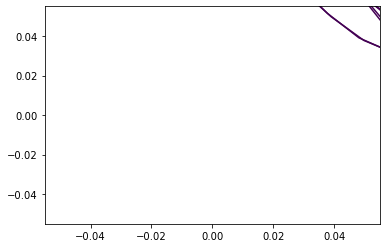

In [7]:
x_10 = []
y_10 = []
x_60 = []
y_60 = []
x_99 = []
y_99 = []

for X,Y,Z in zip(separation,mass_ratio,percent_recovered):
    #print(tt)
    contour_10 =  plt.contour(X,Y,Z,levels=[10])
    contour_60 =  plt.contour(X,Y,Z,levels=[60])
    contour_99 =  plt.contour(X,Y,Z,levels=[99])
    data_10 = contour_10.allsegs[0][0]
    data_60 = contour_60.allsegs[0][0]
    data_99 = contour_99.allsegs[0][0]
    #print(np.array(data).shape)
    x_10.append(data_10[:,0])
    y_10.append(data_10[:,1])
    x_60.append(data_60[:,0])
    y_60.append(data_60[:,1])
    x_99.append(data_99[:,0])
    y_99.append(data_99[:,1])
x_10 = np.array(x_10)
y_10 = np.array(y_10)
x_60 = np.array(x_60)
y_60 = np.array(y_60)
x_99 = np.array(x_99)
y_99 = np.array(y_99)

print(x_99.shape,y_99.shape)

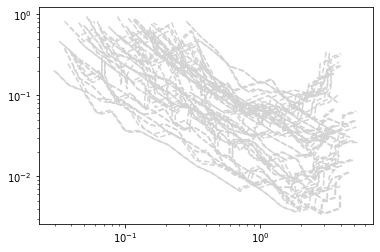

In [8]:
#for x,y in zip(x_99[:5],y_99[:5]):
#    plt.plot(x,y,'--',color='black')
#for x,y in zip(x_50[:5],y_50[:5]):
#    plt.plot(x,y,'--',color='grey')
for x,y in zip(x_99,y_99):
    plt.plot(x,y,'--',color='lightgrey')

plt.xscale('log')
plt.yscale('log')
plt.show()

#print(targets_all[20:])

In [9]:
def interp(xvals,yvals,level):
    xflatten = np.concatenate([x.ravel() for x in xvals])
    global_min = np.min(xflatten)
    global_max = np.max(xflatten)
    
    min_max_xs = [(min(x), max(x)) for x in xvals]
    new_axis_xs = np.array([np.linspace(global_min, global_max, 100) for x in xvals])
    new_axis_ys = np.array([np.interp(new_x_axis, x, y,left=np.nan,right=np.nan) for x, y, new_x_axis in zip(xvals, yvals, new_axis_xs)])

    midx = np.array([np.nanmedian([new_axis_xs[axis_idx][i] for axis_idx in range(len(xvals))]) for i in range(100)])
    
    newy = []
    for i in range(100):
        idx_nan = np.argwhere(np.isnan(new_axis_ys[:,i]))
        if (len(xvals)-len(idx_nan)) < 60:
            newy.append(np.nan)
        else:
            newy.append(np.nanquantile([new_axis_ys[axis_idx][i] for axis_idx in range(len(xvals))],level))
    newy = np.array(newy)
    
    #print(midx,midy)
    #return(new_axis_xs,new_axis_ys)
    return(midx,newy,new_axis_xs,new_axis_ys)

In [10]:
x_90_quantile, y_90_quantile, xtest_90, ytest_90 = interp(x_60,y_60,0.90)
x_50_quantile, y_50_quantile, xtest_50, ytest_50 = interp(x_60,y_60,0.50)
x_10_quantile, y_10_quantile, xtest_10, ytest_10 = interp(x_60,y_60,0.10)

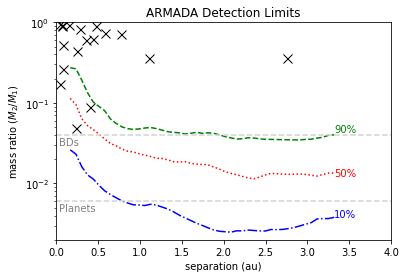

In [11]:
#for x,y in zip(xtest_90,ytest_90):
#    plt.plot(x,y,'-',color='lightgrey')
plt.plot(x_90_quantile,y_90_quantile,'--',color='green')
plt.plot(x_50_quantile,y_50_quantile,':',color='red')
plt.plot(x_10_quantile,y_10_quantile,'-.',color='blue')

plt.annotate('90%',xy=(x_90_quantile[np.argwhere(~np.isnan(y_90_quantile))[:,0]][-1],
                       y_90_quantile[np.argwhere(~np.isnan(y_90_quantile))[:,0]][-1]+0.003),color='green')
plt.annotate('50%',xy=(x_50_quantile[np.argwhere(~np.isnan(y_50_quantile))[:,0]][-1],
                       y_50_quantile[np.argwhere(~np.isnan(y_50_quantile))[:,0]][-1]-0.001),color='red')
plt.annotate('10%',xy=(x_10_quantile[np.argwhere(~np.isnan(y_10_quantile))[:,0]][-1],
                       y_10_quantile[np.argwhere(~np.isnan(y_10_quantile))[:,0]][-1]),color='blue')

plt.plot(separation_detections,mass_ratio_detections,'x',color='black',markersize=9)

plt.axhline(y=0.04,linestyle='--',color='lightgrey')
plt.annotate('BDs',xy=(0.035,0.03),color='grey')
plt.axhline(y=0.006,linestyle='--',color='lightgrey')
plt.annotate('Planets',xy=(0.035,0.0045),color='grey')

#plt.xscale('log')
plt.yscale('log')
plt.xlabel('separation (au)')
plt.ylabel('mass ratio ($M_2 / M_1$)')
plt.ylim(0.002,1)
#plt.xlim(np.min(abin),np.max(abin))
plt.xlim(0,4)
#plt.axis('equal')
plt.title('ARMADA Detection Limits')
#plt.colorbar(ticks=[20,40,60,80,100],label="planets recovered").set_ticklabels(['20%','40%','60%','80%','100%'])
#plt.colorbar()
#plt.savefig('/Users/tgardner/ARMADA_orbits/mass_limits/armada_detection_limits_60ci.pdf')
plt.show()